# **Loan Eligibility Prediction**

In [ ]:
import pandas as pd

: 

In [2]:
import numpy as np

In [3]:
loan=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Loan%20Eligibility%20Prediction.csv')

In [4]:
loan.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


In [6]:
loan.describe()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
loan.shape

(614, 13)

In [8]:
loan.columns

Index(['Customer_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

# **Get Unique Values**

In [9]:
loan['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

# **Get Counts and Categories of Categorical Variables**

In [11]:
loan['Gender'].value_counts()

Gender
Male      499
Female    115
Name: count, dtype: int64

In [12]:
loan['Married'].value_counts()

Married
Yes    399
No     215
Name: count, dtype: int64

In [13]:
loan['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [14]:
loan['Self_Employed'].value_counts()

Self_Employed
No     523
Yes     91
Name: count, dtype: int64

In [15]:
loan['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

# **Encoding of Categorical Features**

In [16]:
loan.replace({'Gender': {'Male': 0,'Female': 1}},inplace=True)

In [17]:
loan.replace({'Married': {'No': 0,'Yes': 1}},inplace=True)

In [18]:
loan.replace({'Education': {'Not Graduate': 0,'Graduate': 1}},inplace=True)

In [19]:
loan.replace({'Self_Employed': {'No': 0,'Yes': 1}},inplace=True)

In [20]:
loan.replace({'Property_Area': {'Rural': 0,'Semiurban': 1,'Urban': 1}},inplace=True)

# **Define dependent(y) and independent(x) variables**

In [21]:
y=loan['Loan_Status']

In [22]:
y.shape

(614,)

In [23]:
y

0      N
1      Y
2      Y
3      Y
4      Y
      ..
609    N
610    N
611    N
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [24]:
x=loan[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [25]:
x=loan.drop(['Customer_ID','Loan_Status'],axis=1)

In [26]:
x.shape

(614, 11)

In [27]:
x

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,2378,0.0,9,360,1,1
1,0,1,2,1,0,1299,1086.0,17,120,1,1
2,0,0,0,0,0,3620,0.0,25,120,1,1
3,0,1,0,1,1,3459,0.0,25,120,1,1
4,0,1,1,1,0,5468,1032.0,26,360,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,2,1,0,2947,1603.0,10,360,1,1
610,0,0,0,1,0,4680,2087.0,15,360,1,1
611,0,1,2,1,1,6633,0.0,25,360,0,0
612,0,1,1,0,0,2492,2375.0,30,360,1,0


# **Get x variables Standardize**

In [28]:
x_std=x[['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term']]

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
ss= StandardScaler()

In [31]:
x_std= ss.fit_transform(x_std)

In [32]:
x_std

array([[-0.49564665, -0.55448733, -1.52878429,  0.30300926],
       [-0.6724141 , -0.18306108, -1.4368431 , -3.14231829],
       [-0.29217568, -0.55448733, -1.34490192, -3.14231829],
       ...,
       [ 0.20142983, -0.55448733, -1.34490192,  0.30300926],
       [-0.47697057,  0.25779382, -1.28743867,  0.30300926],
       [-0.49204249,  0.74516252, -1.34490192, -2.2809864 ]])

In [33]:
x[['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term']]= pd.DataFrame(x_std,columns=['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term'])

In [34]:
x

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,-0.495647,-0.554487,-1.528784,0.303009,1,1
1,0,1,2,1,0,-0.672414,-0.183061,-1.436843,-3.142318,1,1
2,0,0,0,0,0,-0.292176,-0.554487,-1.344902,-3.142318,1,1
3,0,1,0,1,1,-0.318552,-0.554487,-1.344902,-3.142318,1,1
4,0,1,1,1,0,0.010573,-0.201530,-1.333409,0.303009,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,2,1,0,-0.402430,-0.006240,-1.517292,0.303009,1,1
610,0,0,0,1,0,-0.118521,0.159294,-1.459828,0.303009,1,1
611,0,1,2,1,1,0.201430,-0.554487,-1.344902,0.303009,0,0
612,0,1,1,0,0,-0.476971,0.257794,-1.287439,0.303009,1,0


# **Train Test Split**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, stratify=y, random_state=2529)

In [37]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((429, 11), (185, 11), (429,), (185,))

# **Get Model Train**

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt=DecisionTreeClassifier(max_depth=3, random_state=2529)

In [40]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2529)

# **Prediction**

In [41]:
y_pred=dt.predict(x_test)

In [42]:
y_pred.shape

(185,)

In [43]:
y_pred

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

# **Probability of Each Predicted Class**

In [44]:
dt.predict_proba(x_test)

array([[0.1547619 , 0.8452381 ],
       [0.85294118, 0.14705882],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.29245283, 0.70754717],
       [0.1547619 , 0.8452381 ],
       [0.29245283, 0.70754717],
       [0.1547619 , 0.8452381 ],
       [0.29245283, 0.70754717],
       [0.1547619 , 0.8452381 ],
       [0.29245283, 0.70754717],
       [0.85294118, 0.14705882],
       [0.85294118, 0.14705882],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.1547619 , 0.8452381 ],
       [0.85294118, 0.14705882],
       [0.29245283, 0.70754717],
       [0.1547619 , 0.8452381 ],
       [0.29245283, 0.70754717],
       [0.85294118, 0.14705882],
       [0.1547619 , 0.8452381 ],
       [1.

# **Model Evaluation**

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
print(confusion_matrix(y_test, y_pred))

[[ 22  36]
 [  4 123]]


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.85      0.38      0.52        58
           Y       0.77      0.97      0.86       127

    accuracy                           0.78       185
   macro avg       0.81      0.67      0.69       185
weighted avg       0.80      0.78      0.75       185



# **Decision Tree Plot**

In [48]:
from sklearn.tree import plot_tree

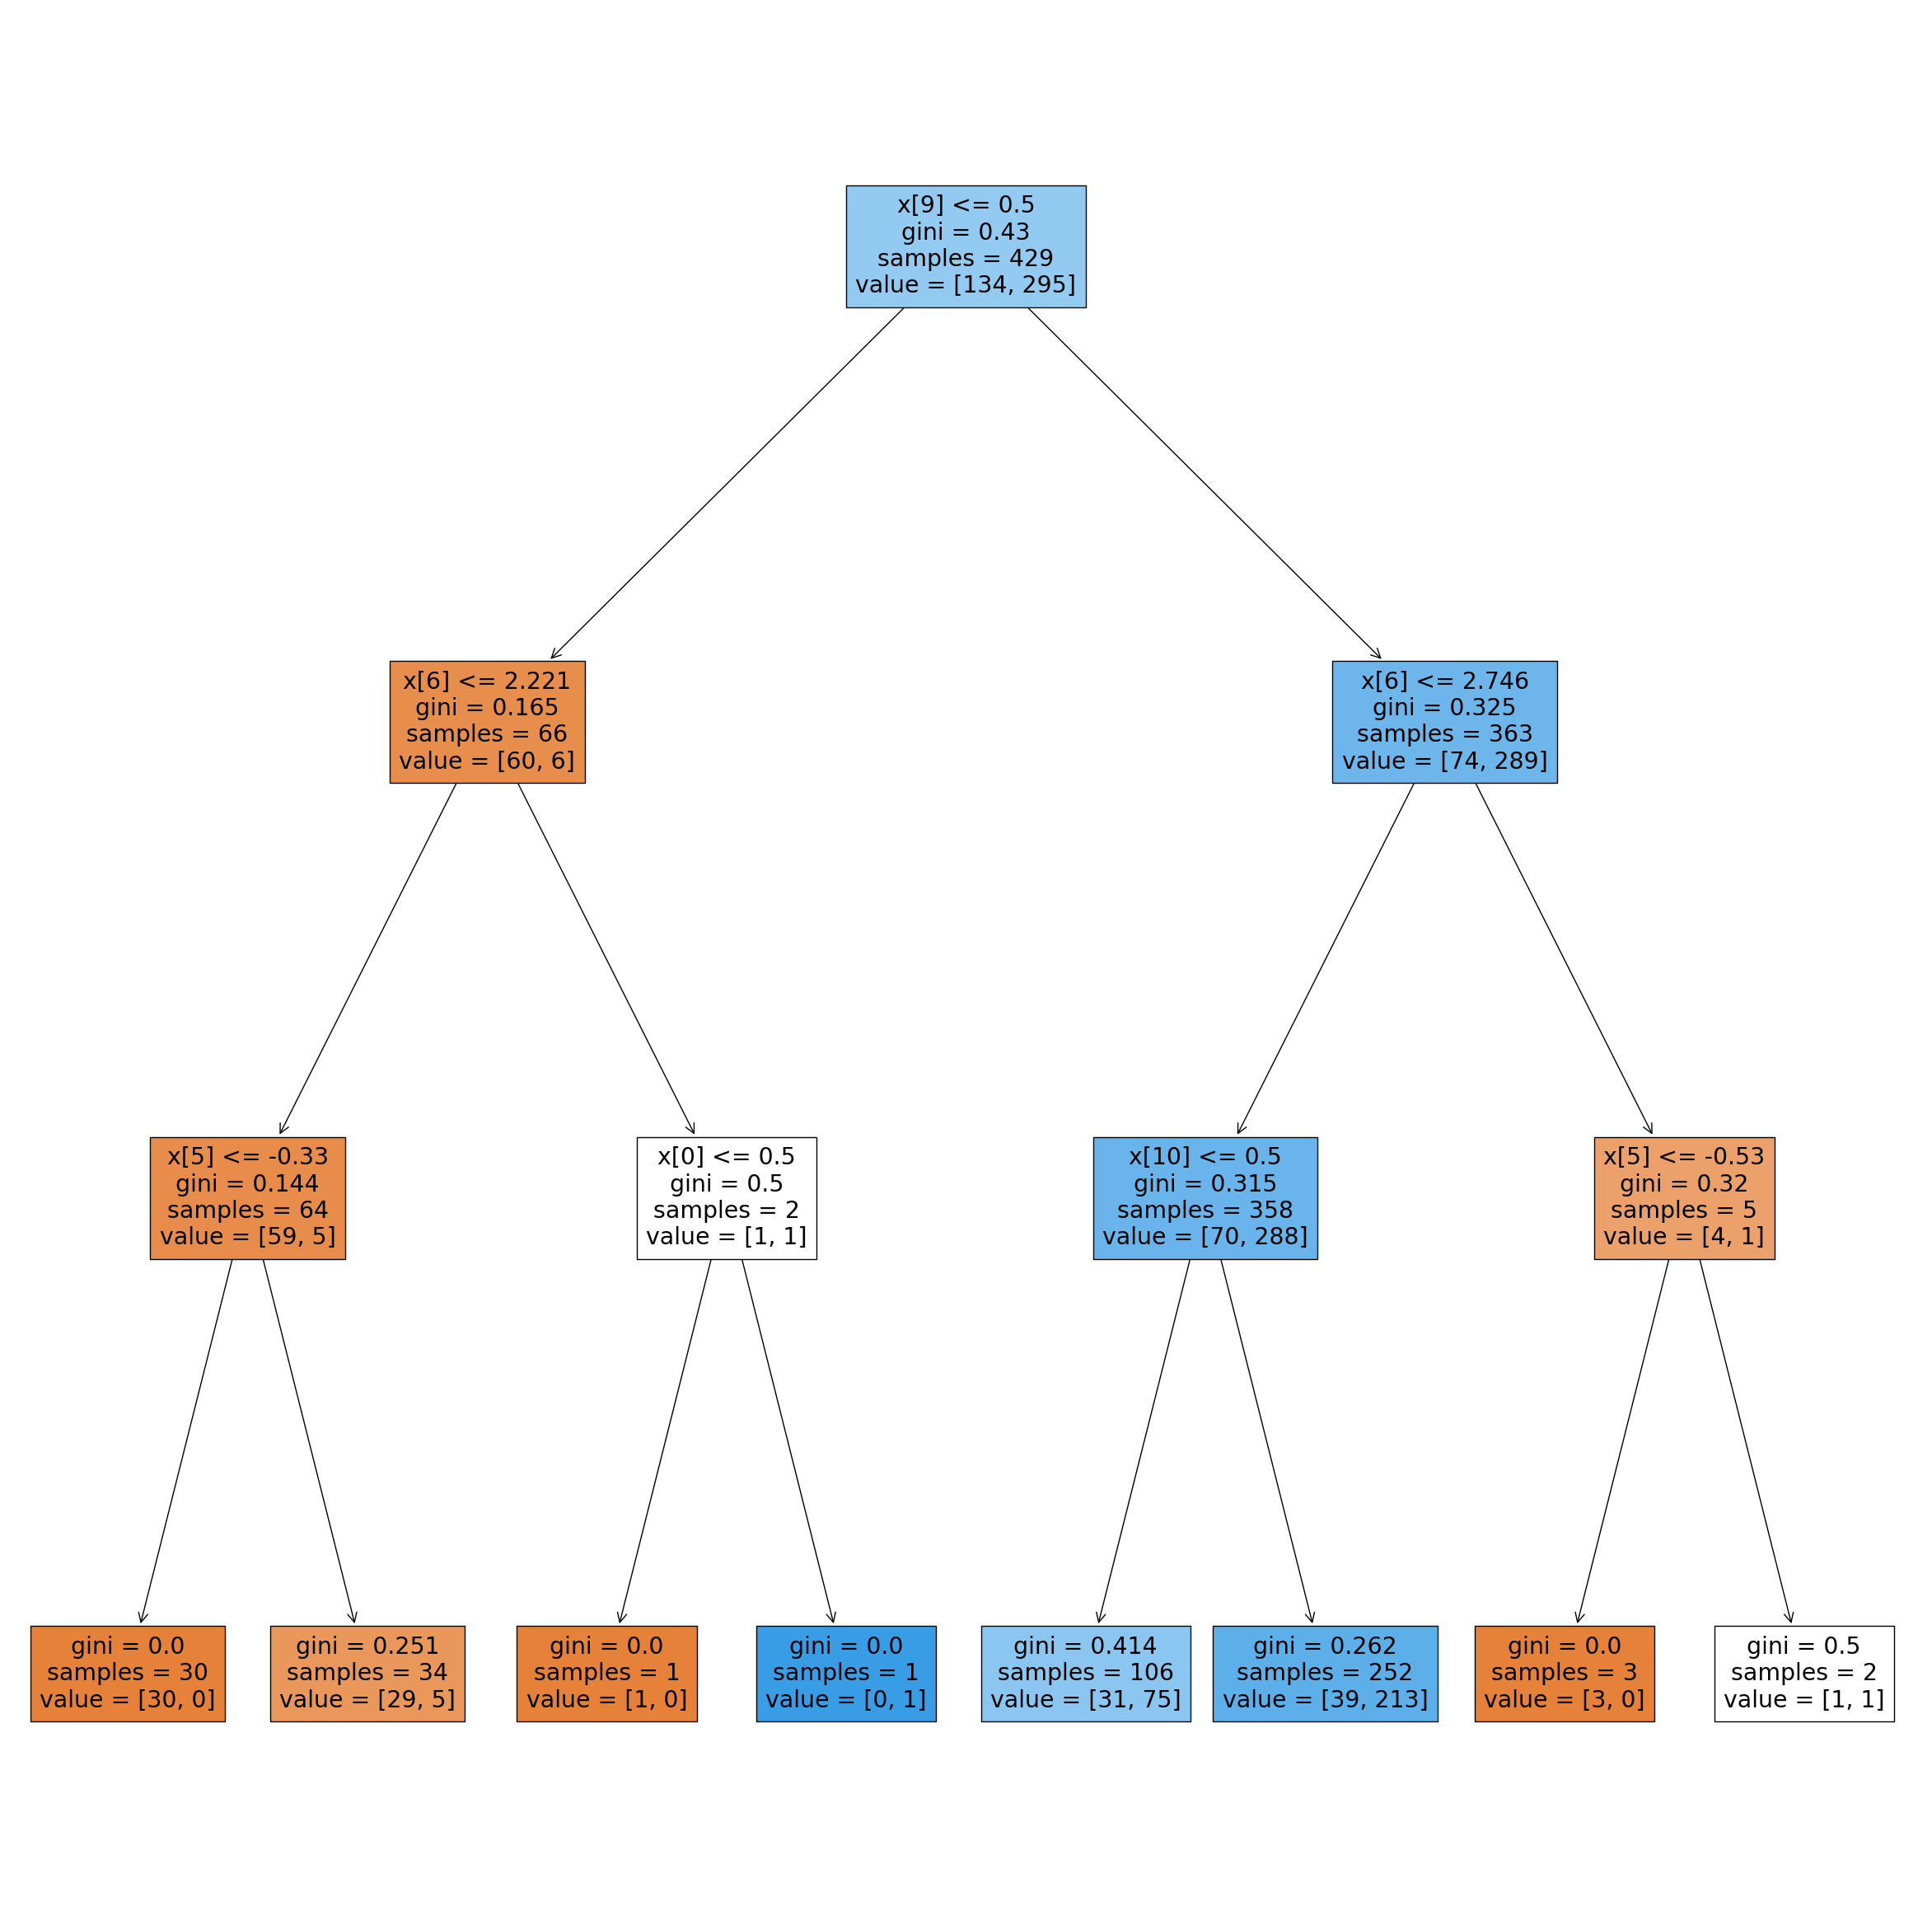

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plot_tree(dt,filled=True);